In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import h5py
import torch

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
np.set_printoptions(precision=2, suppress=False)

cuda:0


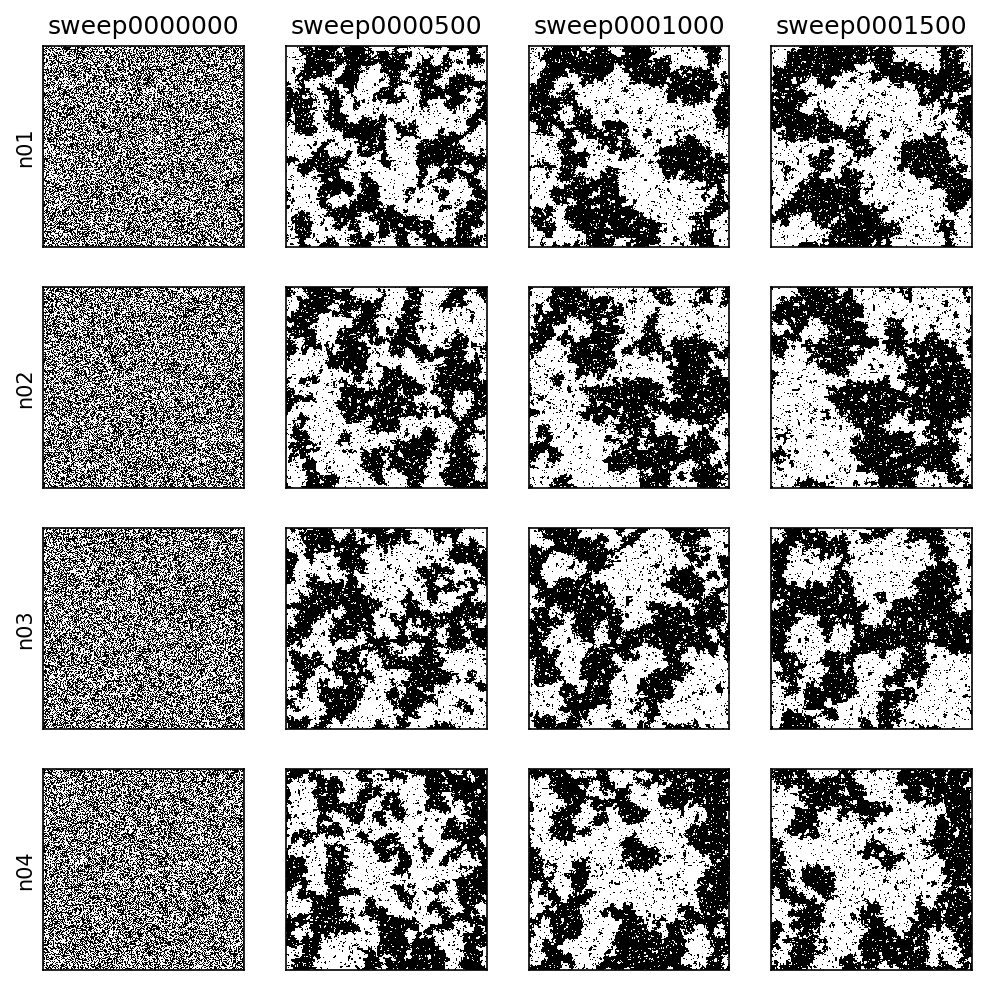

In [2]:
from tqdm import tqdm
from glob import glob
import json
import os

data_dir = '/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data'
folders = sorted(glob(f'{data_dir}/n*'))

fig, ax = plt.subplots(4,4, dpi=150, figsize=(8,8))

for i in range(4):
    data_files = sorted(glob(f'{folders[i]}/sweep*.npy'))
    for j in range(4):
        frame_num = 15 + 5 * j
        frame_num = j
        data = np.load(data_files[frame_num], mmap_mode='r')
        ax[i,j].imshow(data, cmap='Greys', interpolation='None', vmin=-1, vmax=1)
        ax[i,j].set(xticks=[], yticks=[])
        
        ax[0,j].set_title(os.path.basename(data_files[frame_num])[:-4])
    ax[i,0].set_ylabel(os.path.basename(folders[i]))

# Convert simulation outputs to hdf5 data store

In [3]:
import h5py
import json
import os
from pprint import pprint
from glob import glob
from tqdm.auto import tqdm

for folder in folders:
    print(folder)
    param_file = f'{folder}/params.json'
    data_files = sorted(glob(f'{folder}/sweep*.npy'))
    with open(param_file, 'r') as pfile:
        params = json.load(pfile)

    with h5py.File(f'{folder}/dataset.hdf5', 'w') as h5f:
        for file in tqdm(data_files):
            name = os.path.basename(file)
            sweep = int(name[5:-4])
            data = np.load(file, mmap_mode='r')
            
            group = h5f.create_group(name)
            group.create_dataset('state', data=np.load(file, mmap_mode='r'))
            group.create_dataset('sweep', data=np.array([sweep,]))

/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n01


100%|██████████| 201/201 [00:00<00:00, 646.67it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n02


100%|██████████| 201/201 [00:00<00:00, 994.16it/s] 


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n03


100%|██████████| 201/201 [00:00<00:00, 1007.83it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n04


100%|██████████| 201/201 [00:00<00:00, 1009.01it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n05


100%|██████████| 201/201 [00:00<00:00, 1008.38it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n06


100%|██████████| 201/201 [00:00<00:00, 955.51it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n07


100%|██████████| 201/201 [00:00<00:00, 1006.27it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n08


100%|██████████| 201/201 [00:00<00:00, 472.74it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n09


100%|██████████| 201/201 [00:02<00:00, 69.14it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n10


100%|██████████| 201/201 [00:02<00:00, 82.68it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n11


100%|██████████| 201/201 [00:02<00:00, 71.98it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n12


100%|██████████| 201/201 [00:02<00:00, 90.79it/s] 


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n13


100%|██████████| 201/201 [00:02<00:00, 90.36it/s] 


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n14


100%|██████████| 201/201 [00:02<00:00, 71.92it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n15


100%|██████████| 201/201 [00:02<00:00, 84.47it/s] 


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n16


100%|██████████| 201/201 [00:02<00:00, 100.33it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n17


100%|██████████| 201/201 [00:02<00:00, 98.47it/s] 


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n18


100%|██████████| 201/201 [00:01<00:00, 105.03it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n19


100%|██████████| 201/201 [00:01<00:00, 132.29it/s]


/project/vitelli/dsseara/ising/2024-04-15_kawasaki/data/n20


100%|██████████| 201/201 [00:01<00:00, 143.16it/s]
